<a href="https://colab.research.google.com/github/code130/hello-world/blob/master/Random_Forest_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
GENOMICS_DATA_URL = '/content/drive/MyDrive/SSI Project/datasets/gene_expression/source/Breast_GSE70947.csv'
data_frame = pd.read_csv(GENOMICS_DATA_URL)


data_frame = data_frame.drop(columns="samples")

In [ ]:
y = data_frame['type']
#display(y)

df_x = data_frame.iloc[:,2:].values
#display(df_x)

In [ ]:
df_x_scaled = minmax_scale(df_x, axis = 0)

In [ ]:
# define the number of features
ncol = df_x_scaled.shape[1]
ncol

35980

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, y, train_size = 0.9, random_state = seed(2052))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

display(confusion_matrix(Y_test,y_pred))
display(classification_report(Y_test,y_pred))


array([[15,  0],
       [ 0, 14]])

'                       precision    recall  f1-score   support\n\nbreast_adenocarcinoma       1.00      1.00      1.00        15\n               normal       1.00      1.00      1.00        14\n\n             accuracy                           1.00        29\n            macro avg       1.00      1.00      1.00        29\n         weighted avg       1.00      1.00      1.00        29\n'

In [ ]:
display(accuracy_score(Y_test, y_pred))

1.0

In [ ]:
pip install shap

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
import shap

explainer = shap.TreeExplainer(rfc)
shap_expected_value = explainer.expected_value
print(shap_expected_value) 

#shap_values = explainer.shap_values(X_train)

[0.49673077 0.50326923]


In [ ]:
# extract shape values
shap_values = explainer.shap_values(df_x)
print(shap_values)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])]


In [ ]:
shap_values[1][1]

array([0., 0., 0., ..., 0., 0., 0.])

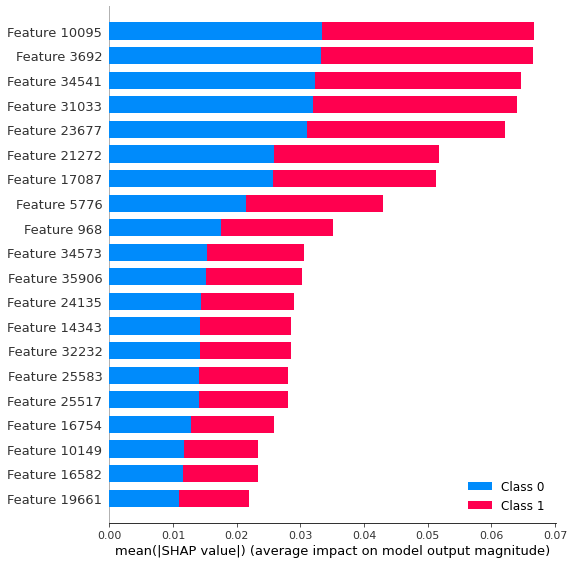

In [ ]:
shap.summary_plot(shap_values, df_x)

In [ ]:
# Visualize a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], df_x[0,:])

In [58]:
# Visualize many predictions
shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1][:5,:], df_x[:5,:])


In [ ]:
shap.dependence_plot(name, shap_values[1], X, display_features=X_display)

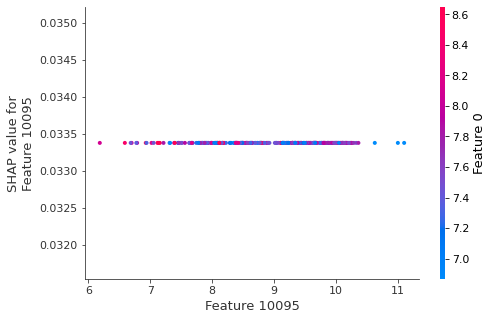

In [61]:
    shap.dependence_plot("Feature 10095", shap_values[1], df_x, display_features=df_x)
